# Libraries / Shortcuts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nba_api.stats.endpoints import shotchartdetail
import json

seasons = [
    '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', 
    '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', 
    '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21'
]

# Load Data

In [44]:
# # GOAL: Web Scraping in nba.com/stats to get datasets containing all shots in a season (regular season / playoffs)

# # Do one stage at a time as API sometimes fails with regular season requests
# stage = 'Playoffs'
# seasons_data = []

# # Iterate through all official games
# for season in seasons:
# 	# Get all field goald attempts (FGA)
#     response = shotchartdetail.ShotChartDetail(
# 		team_id=0,
# 		player_id=0,
# 		context_measure_simple='FGA',
# 		season_nullable=season,
# 		season_type_all_star=stage
# 	)

#     # Get the relevant data
#     current_season_data = response.get_data_frames()[0]
#     seasons_data.append(current_season_data)

# # Create pandas DataFrame
# all_shots = pd.concat(seasons_data, ignore_index=True)

# # Arrange filename
# if stage == 'Regular Season':
#     stage = 'regular_season'

# all_shots.to_csv('./Data/Shots/all_{}_shots.csv'.format(stage))

In [43]:
# # GOAL: Create a single dataframe containing all shots from season 2000-01 to 2020-21

# stages = ['Regular Season', 'Playoffs']
# all_season_data = []

# # Iterate seasons 2000-01 up to 2020-21
# for season in seasons:
#     for stage in stages:
#         # Load current season data
#         season_data = pd.read_csv('./Data/Shots/{0}/shots_{1}_{0}.csv'.format(stage, season), index_col=0)
#         # Add season and stage columns
#         season_data[['SEASON ID', 'SEASON STAGE']] = [season, stage]
#         season_data.head()

#         all_season_data.append(season_data)  

# # Concatenate new data with all data
# all_shots = pd.concat(all_season_data, ignore_index=True)

# # Drop unnecessary columns
# all_shots.drop(
#     ['GRID_TYPE', 'GAME_EVENT_ID', 'EVENT_TYPE', 'SHOT_ATTEMPTED_FLAG', 'GAME_DATE', 'HTM', 'VTM'],
#     axis=1,
#     inplace=True)

# # Rename columns by removing underscore
# # (e.g. 'GAME_ID' -> 'GAME ID')
# column_names = {}
# for column in all_shots.columns:
#     column_names[column] = ' '.join(column.split('_'))

# all_shots.rename(columns=column_names, inplace=True)

# # Move 'SEASON ID' and 'SEASON STAGE' columns to the front
# cols_to_move = ['SEASON ID', 'SEASON STAGE']
# all_shots = all_shots[cols_to_move + [col for col in all_shots.columns if col not in cols_to_move]]

# # Renaming
# all_shots['SHOT MADE FLAG'].replace({0: False, 1: True}, inplace=True)
# all_shots['SHOT TYPE'].replace({'2PT Field Goal': 2, '3PT Field Goal': 3}, inplace=True)
# # e.g. 'Center(C)' > 'Center', 'Left Side(L)': 'Left Side'
# all_shots['SHOT ZONE AREA'] = all_shots['SHOT ZONE AREA'].str.split('(').str[0]

# # Save
# all_shots.to_csv('./Data/Shots/all_shots.csv')
# all_shots.head()

In [2]:
# Load all shots
all_shots = pd.read_csv('Data/Shots/all_shots.csv', index_col=0)
all_shots

,SEASON ID,SEASON STAGE,GAME ID,PLAYER ID,PLAYER NAME,TEAM ID,TEAM NAME,PERIOD,MINUTES REMAINING,SECONDS REMAINING,ACTION TYPE,SHOT TYPE,SHOT ZONE BASIC,SHOT ZONE AREA,SHOT ZONE RANGE,SHOT DISTANCE,LOC X,LOC Y,SHOT MADE FLAG
0,2000-01,Regular Season,20000001,84,Latrell Sprewell,1610612752,New York Knicks,1,11,41,Jump Shot,2,In The Paint (Non-RA),Center,Less Than 8 ft.,6,-58,28,False
1,2000-01,Regular Season,20000001,947,Allen Iverson,1610612755,Philadelphia 76ers,1,11,8,Jump Shot,2,Mid-Range,Left Side Center,16-24 ft.,19,-107,167,False
2,2000-01,Regular Season,20000001,275,Allan Houston,1610612752,New York Knicks,1,10,53,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,15,-151,13,False
3,2000-01,Regular Season,20000001,238,Tyrone Hill,1610612755,Philadelphia 76ers,1,10,35,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,9,-94,17,False
4,2000-01,Regular Season,20000001,84,Latrell Sprewell,1610612752,New York Knicks,1,10,19,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,13,-101,95,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435177,2020-21,Playoffs,42000406,203114,Khris Middleton,1610612749,Milwaukee Bucks,4,0,56,Pullup Jump shot,2,Mid-Range,Right Side,16-24 ft.,16,144,90,True
4435178,2020-21,Playoffs,42000406,1626164,Devin Booker,1610612756,Phoenix Suns,4,0,50,Jump Shot,3,Above the Break 3,Right Side Center,24+ ft.,26,105,242,False
4435179,2020-21,Playoffs,42000406,101108,Chris Paul,1610612756,Phoenix Suns,4,0,37,Pullup Jump shot,3,Above the Break 3,Center,24+ ft.,27,2,277,False
4435180,2020-21,Playoffs,42000406,101108,Chris Paul,1610612756,Phoenix Suns,4,0,11,Driving Layup Shot,2,Restricted Area,Center,Less Than 8 ft.,1,5,18,True


# Dataset Description

Every row in the dataset represents a different field-goal attempt. Therefore, the dataset contains all shots from every official game (regular season + playoffs) for every season between the 2000-01 season and 2020-21 season (both included).

Now I explain some basketball terms to grasp a better understanding of the columns' meanings.

- Each game has 4 periods of twelve minutes each. In case of a tie at the end of the 48 minutes, the game continues with extra periods of 5 minutes until there is no tie at the end of the 5 minutes. 'PERIOD' column goes up to 8, meaning there have been matches where 4 extra periods have been needed to cancel the tie.
- MINUTES REMAINING are from 0 to 12.
- SECONDS REMAINING are from 0 to 60.
- ACTION TYPE: the 'style' of the shot (e.g. Hook Shot, Jump Shot, etc.)
- SHOT TYPE: how many points the shot is worth (either 2 or 3)

SHOT LOCATIONS

- 'LOC X', 'LOC Y': X and Y coordinates of shooting location. The location is measured relative to the basket the shot is directed towards. 
    - X goes from -250 to 250 (left and right side of the court). 
    - Y goes from -52 (slightly behind the offensive basket) to 884 (the defensive basket). 
    - To visualise coordinates: https://datavizardry.files.wordpress.com/2020/01/image-4.png  
---
- 'SHOT ZONE BASIC' coordinates ranges: 
    - In The Paint (Non-RA): X (-80, 80) --- Y (-52, 138)
    - Mid-Range: X (-220, 220) --- Y (-52, 237)
    - Restricted Area: X (-39, 39) --- Y (-39, 39)
    - Right Corner 3: X (220, 250) --- Y (-51, 87)
    - Above the Break 3: X (-250, 250) --- Y (88, 419)
    - Left Corner 3: X (-250, -220) --- Y (-47, 87)
    - Backcourt: Y (420, 884)

---
 
- 'SHOT ZONE AREA' coordinates ranges:
    - Center: X (-128, 128)   
    - Left Side Center: X (-250, 50)
    - Left Side: X (-250, -41)
    - Right Side: X (41, 250)
    - Right Side Center: X (50, 250) 
    - Back Court: Y (398, 884)

---

- 'SHOT ZONE RANGE' / 'SHOT ZONE DISTANCE'   
https://www.harrodsport.com/uploads/wysiwyg/img/basketball-court-dimensions-and-markings-in-feet.png


In [4]:
print('Shape:', all_shots.shape, end='\n\n')
print('Columns:', list(all_shots.columns), end='\n\n')

Shape: (4435182, 19)

Columns: ['SEASON ID', 'SEASON STAGE', 'GAME ID', 'PLAYER ID', 'PLAYER NAME', 'TEAM ID', 'TEAM NAME', 'PERIOD', 'MINUTES REMAINING', 'SECONDS REMAINING', 'ACTION TYPE', 'SHOT TYPE', 'SHOT ZONE BASIC', 'SHOT ZONE AREA', 'SHOT ZONE RANGE', 'SHOT DISTANCE', 'LOC X', 'LOC Y', 'SHOT MADE FLAG']



# Speed of the Game
To get a feel for the changes in the speed of the game, we can analyse the shot data throughout the years. I will measure the average time taken between consecutive shots as an indicator of the speed of the game, as well as the total amount of shot attempts per game.

## AVG Shots per Game
I analyse the amount of shots per game, instead of per season, because some seasons had different number of games due to special circumstances like COVID-19 or the 2011 NBA Lockout. To make this analysis fair, I use the per-48 minutes stats, therefore I exclude overtime periods (more minutes -> outliers). 

In [5]:
# GOAL: Find 'outlier' games

num_unique_games = len(all_shots['GAME ID'].unique())

# Calculate overtime games
num_games_overtime = len(all_shots[all_shots['PERIOD'] > 4]['GAME ID'].unique())
print('{} games went into overtime ({}% of all games).'.format(num_games_overtime, round(100*(num_games_overtime/num_unique_games))))

# Not only should I exclude periods above 4, but also games where 
# less than 4 periods were played (e.g. game cancelled after start)
num_games_less_than_4_periods = len(all_shots[all_shots['PERIOD'] < 4]['GAME ID'].unique())

if num_unique_games == num_games_less_than_4_periods:
    print('All games ({0}) had a minimum of 4 periods.'.format(num_unique_games), end='\n\n')
else:
    print('{0} games had less than 4 periods.'.format(num_unique_games-num_games_less_than_4_periods), end='\n\n')

# Total number of shot attempts in each period
print('Total shot attempts in each period (1-8):')
all_shots['PERIOD'].value_counts()

1653 games went into overtime (6% of all games).
All games (26838) had a minimum of 4 periods.

Total shot attempts in each period (1-8):


1    1160459
2    1106944
3    1085795
4    1049785
5      27575
6       3875
7        659
8         90
Name: PERIOD, dtype: int64

In [6]:
# GOAL: Get amount of 2PT and 3PT shots in each game

# Exclude games that went into overtime (i.e PERIOD > 4)
shots_per_48 = all_shots[all_shots['PERIOD'] <= 4]

# Count number of 2&3PT shots in each game
shots_per_48 = shots_per_48.groupby(['GAME ID', 'SHOT TYPE']).size().reset_index(name='COUNT')

# Add season columns
shots_per_48 = shots_per_48.merge(all_shots[['SEASON ID', 'SEASON STAGE', 'GAME ID']], on='GAME ID')
# Remove duplicates
shots_per_48 = shots_per_48.drop_duplicates().reset_index(drop=True)

shots_per_48

,GAME ID,SHOT TYPE,COUNT,SEASON ID,SEASON STAGE
0,20000001,2,117,2000-01,Regular Season
1,20000001,3,19,2000-01,Regular Season
2,20000002,2,146,2000-01,Regular Season
3,20000002,3,17,2000-01,Regular Season
4,20000003,2,128,2000-01,Regular Season
...,...,...,...,...,...
53671,42000404,3,52,2020-21,Playoffs
53672,42000405,2,127,2020-21,Playoffs
53673,42000405,3,47,2020-21,Playoffs
53674,42000406,2,116,2020-21,Playoffs


In [7]:
# GOAL: Get average amount of shots per game

# Sum number of shots in each game
sum_shots_per_48 = shots_per_48.groupby(['GAME ID', 'SEASON ID', 'SEASON STAGE']).sum().reset_index().drop('SHOT TYPE', axis=1)
    
# Calculate average number of shots per game for each season
avg_shots_per_48 = sum_shots_per_48.groupby(['SEASON ID', 'SEASON STAGE']).mean().reset_index().drop(['GAME ID'], axis=1)
avg_shots_per_48.rename(
    columns={'COUNT': 'AVG SHOTS PER 48'},
    inplace=True)

avg_shots_per_48.head()

,SEASON ID,SEASON STAGE,AVG SHOTS PER 48
0,2000-01,Playoffs,160.028169
1,2000-01,Regular Season,159.943650
2,2001-02,Playoffs,158.408451
3,2001-02,Regular Season,161.428932
4,2002-03,Playoffs,157.181818


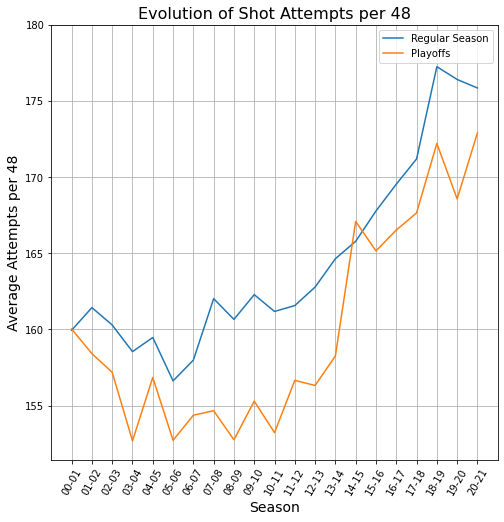

In [8]:
# Plot the table above
plt.figure(figsize=(8,8))
plt.title('Evolution of Shot Attempts per 48', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Attempts per 48', fontsize=14)

# Plot regular season and playoffs separately
for season_stage in ['Regular Season', 'Playoffs']:
    shot_data = avg_shots_per_48[avg_shots_per_48['SEASON STAGE'] == season_stage]
    plt.plot('SEASON ID', 'AVG SHOTS PER 48', data=shot_data, label=season_stage)

x_labels = [season[2:] for season in avg_shots_per_48['SEASON ID'].unique()]
plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.xticks(np.arange(0,21), x_labels)
plt.yticks(np.arange(155, 185, step=5))
plt.grid(True)
plt.legend()

plt.savefig('./Graphs/Shots/Evolution of Shot Attempts per 48')

### Results
The graph above shows that the game speed has increased significantly throughout the years as teams are able to put more shots up in the same time frame (48mins). In the 2000-01 season a game had (on average) almost 160 shots. In today's games there are around 175 shots being taken.

The difference in the number of shots taken in the different season stages is also noticeable. When teams are competing in the playoffs (final stage of the competition), they take fewer shots in general because every game is decisive and each shot has to be taken wisely. This is true for all year seasons except 2000-01 and 2014-15, although the difference is minimal.

## AVG Time Between Shots

In [9]:
df_time = all_shots[['SEASON ID', 'SEASON STAGE', 'GAME ID', 'PERIOD', 'MINUTES REMAINING', 'SECONDS REMAINING']].copy()
df_time['TOTAL PLAYING TIME'] = 60*12*df_time['PERIOD'] - 60*df_time['MINUTES REMAINING'] - df_time['SECONDS REMAINING']
df_time['TIME BETWEEN SHOTS'] = df_time['TOTAL PLAYING TIME'].diff()
df_time.head()

,SEASON ID,SEASON STAGE,GAME ID,PERIOD,MINUTES REMAINING,SECONDS REMAINING,TOTAL PLAYING TIME,TIME BETWEEN SHOTS
0,2000-01,Regular Season,20000001,1,11,41,19,NaN
1,2000-01,Regular Season,20000001,1,11,8,52,33.0
2,2000-01,Regular Season,20000001,1,10,53,67,15.0
3,2000-01,Regular Season,20000001,1,10,35,85,18.0
4,2000-01,Regular Season,20000001,1,10,19,101,16.0


In [10]:
# Negative numbers occur for first shots of games
# This should happen for every game except the first one
indices_to_fix = list(df_time.index[df_time['TIME BETWEEN SHOTS'] < 0])
print('TOTAL GAMES = {} ... ERRORS TO FIX = {}'.format(len(all_shots['GAME ID'].unique()), len(indices_to_fix)))
df_time.loc[indices_to_fix].head()

TOTAL GAMES = 26838 ... ERRORS TO FIX = 26837


,SEASON ID,SEASON STAGE,GAME ID,PERIOD,MINUTES REMAINING,SECONDS REMAINING,TOTAL PLAYING TIME,TIME BETWEEN SHOTS
136,2000-01,Regular Season,20000002,1,11,28,32,-2839.0
299,2000-01,Regular Season,20000003,1,11,45,15,-2861.0
450,2000-01,Regular Season,20000004,1,11,47,13,-2867.0
593,2000-01,Regular Season,20000005,1,11,51,9,-2861.0
779,2000-01,Regular Season,20000006,1,11,46,14,-2860.0


In [11]:
# Fix
errors = df_time.loc[indices_to_fix].copy()
df_time.loc[indices_to_fix, 'TIME BETWEEN SHOTS'] = 60*12*errors['PERIOD'] - 60*errors['MINUTES REMAINING'] - errors['SECONDS REMAINING']
print('TOTAL GAMES = {} ... ERRORS TO FIX = {}'.format(len(all_shots['GAME ID'].unique()), (df_time['TIME BETWEEN SHOTS'] < 0).sum()))
df_time.loc[indices_to_fix].head()

TOTAL GAMES = 26838 ... ERRORS TO FIX = 0


,SEASON ID,SEASON STAGE,GAME ID,PERIOD,MINUTES REMAINING,SECONDS REMAINING,TOTAL PLAYING TIME,TIME BETWEEN SHOTS
136,2000-01,Regular Season,20000002,1,11,28,32,32.0
299,2000-01,Regular Season,20000003,1,11,45,15,15.0
450,2000-01,Regular Season,20000004,1,11,47,13,13.0
593,2000-01,Regular Season,20000005,1,11,51,9,9.0
779,2000-01,Regular Season,20000006,1,11,46,14,14.0


In [12]:
# Calculate average time between shots per game
time_between_shots_per_game = df_time.groupby(['GAME ID']).mean().reset_index()[['GAME ID', 'TIME BETWEEN SHOTS']]

# Add season columns
time_between_shots_per_game = time_between_shots_per_game.merge(all_shots[['SEASON ID', 'SEASON STAGE', 'GAME ID']], on='GAME ID')
# Remove duplicates
time_between_shots_per_game = time_between_shots_per_game.drop_duplicates().reset_index(drop=True)
time_between_shots_per_game

,GAME ID,TIME BETWEEN SHOTS,SEASON ID,SEASON STAGE
0,20000001,21.125926,2000-01,Regular Season
1,20000002,17.644172,2000-01,Regular Season
2,20000003,19.072848,2000-01,Regular Season
3,20000004,20.069930,2000-01,Regular Season
4,20000005,15.451613,2000-01,Regular Season
...,...,...,...,...
26833,42000402,15.861878,2020-21,Playoffs
26834,42000403,16.520231,2020-21,Playoffs
26835,42000404,16.445714,2020-21,Playoffs
26836,42000405,16.522989,2020-21,Playoffs


In [13]:
# Calculate average time between shots per game for each season
time_between_shots_per_season = time_between_shots_per_game.groupby(['SEASON ID', 'SEASON STAGE']).mean().reset_index().drop(['GAME ID'], axis=1)
time_between_shots_per_season.head()

,SEASON ID,SEASON STAGE,TIME BETWEEN SHOTS
0,2000-01,Playoffs,18.077415
1,2000-01,Regular Season,18.233851
2,2001-02,Playoffs,18.390195
3,2001-02,Regular Season,18.014516
4,2002-03,Playoffs,18.609730


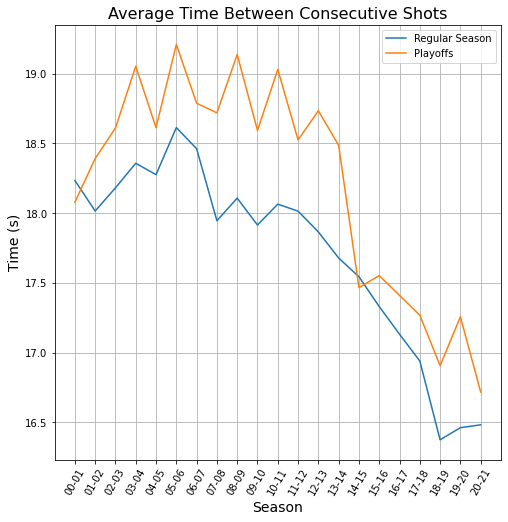

In [14]:
# Plot the table above
plt.figure(figsize=(8,8))
plt.title('Average Time Between Consecutive Shots', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)

# Plot regular season and playoffs separately
for season_stage in ['Regular Season', 'Playoffs']:
    shot_data = time_between_shots_per_season[time_between_shots_per_season['SEASON STAGE'] == season_stage]
    plt.plot('SEASON ID', 'TIME BETWEEN SHOTS', data=shot_data, label=season_stage)

x_labels = [season[2:] for season in time_between_shots_per_season['SEASON ID'].unique()]
plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.xticks(np.arange(0,21), x_labels)
plt.grid(True)
plt.legend()

plt.savefig('./Graphs/Shots/Evolution of Time Between Shots')

In [15]:
# Check correlation between changes in time between shots
# and total amount of shots per game -> (Obvious, but just
# verify)
shots_playoffs = avg_shots_per_48[avg_shots_per_48['SEASON STAGE'] == 'Playoffs']['AVG SHOTS PER 48']
shots_rs = avg_shots_per_48[avg_shots_per_48['SEASON STAGE'] == 'Regular Season']['AVG SHOTS PER 48']
time_playoffs = time_between_shots_per_season[time_between_shots_per_season['SEASON STAGE'] == 'Playoffs']['TIME BETWEEN SHOTS']
time_rs = time_between_shots_per_season[time_between_shots_per_season['SEASON STAGE'] == 'Regular Season']['TIME BETWEEN SHOTS']

correlations = pd.DataFrame({
    'Shots Regular Season': shots_rs,
    'Shots Playoffs': shots_playoffs,
    'Time Regular Season': time_rs,
    'Time Playoffs': time_playoffs
})

correlations.corr()

,Shots Regular Season,Shots Playoffs,Time Regular Season,Time Playoffs
Shots Regular Season,1.000000,NaN,-0.998944,NaN
Shots Playoffs,NaN,1.00000,NaN,-0.99385
Time Regular Season,-0.998944,NaN,1.000000,NaN
Time Playoffs,NaN,-0.99385,NaN,1.00000


### Results
These results show that the mean time spent between consecutive shots has decreased over the years. Although it might not seem like a significant numerical difference, even a 1 second decrease in the length of the average possession can have a significant impact in the overall amount of shot attempts per game. For example, if we take the oldest and most recent regular season average times (18.23s and 16.48s respectively), we see that modern basketball is played at a speed that is 1.1x faster than it was 20 years ago. This is equivalent to saying that for every 10 shots taken in 2000-01, there is an one more shot attempt nowadays.

The (aforementioned) variation in the results across the different competition stages is also visible from this graph. During the playoffs, teams tend to take more time to shoot because the shot selection becomes more decisive.

## AVG 2&3PT per Game

In [16]:
# GOAL: Get average number of 2 and 3 pointers per 48 per season
avg_shots_per_48 = shots_per_48.groupby(['SHOT TYPE', 'SEASON ID', 'SEASON STAGE']).mean()
avg_shots_per_48 = avg_shots_per_48.reset_index().drop(columns='GAME ID').rename(columns={'COUNT': 'AVG ATTEMPTS PER 48'})

# Average 2PT shots per 48
avg_2pt_per_48 = avg_shots_per_48[avg_shots_per_48['SHOT TYPE'] == 2]
avg_2pt_per_48.head()

,SHOT TYPE,SEASON ID,SEASON STAGE,AVG ATTEMPTS PER 48
0,2,2000-01,Playoffs,130.492958
1,2,2000-01,Regular Season,132.824222
2,2,2001-02,Playoffs,125.464789
3,2,2001-02,Regular Season,132.240538
4,2,2002-03,Playoffs,123.625000


In [17]:
# Average 3PT shots per 48
avg_3pt_per_48 = avg_shots_per_48[avg_shots_per_48['SHOT TYPE'] == 3].reset_index(drop=True)
avg_3pt_per_48.head()

,SHOT TYPE,SEASON ID,SEASON STAGE,AVG ATTEMPTS PER 48
0,3,2000-01,Playoffs,29.535211
1,3,2000-01,Regular Season,27.119428
2,3,2001-02,Playoffs,32.943662
3,3,2001-02,Regular Season,29.188394
4,3,2002-03,Playoffs,33.556818


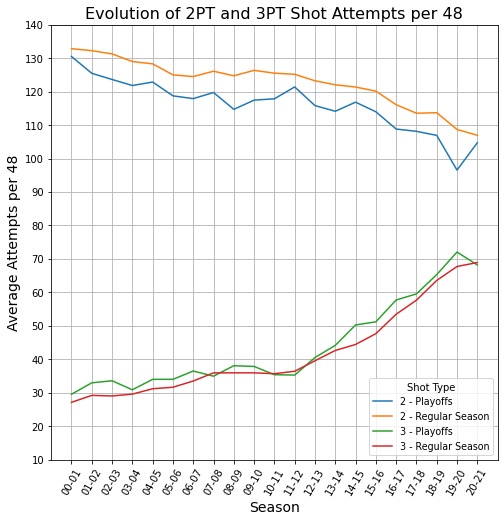

In [18]:
# Plot 2&3PT shot attempt averages per season
plt.figure(figsize=(8,8))
plt.title('Evolution of 2PT and 3PT Shot Attempts per 48', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Attempts per 48', fontsize=14)

# Plot 2PT and 3PT separately
for shot_data in [avg_2pt_per_48, avg_3pt_per_48]:
    shot_type = shot_data['SHOT TYPE'].unique()[0]
    for season_stage in shot_data['SEASON STAGE'].unique():
        plt.plot(
            'SEASON ID','AVG ATTEMPTS PER 48',
            data=shot_data[shot_data['SEASON STAGE'] == season_stage], 
            label='{} - {}'.format(shot_type, season_stage)
        )

x_labels = [season[2:] for season in avg_2pt_per_48['SEASON ID'].unique()]

plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.xticks(np.arange(0,21), x_labels)
plt.yticks(np.arange(10, plt.ylim()[1]+10, step=10))
plt.grid(True)
plt.legend(title='Shot Type', fontsize=9.5)

plt.savefig('./Graphs/Shots/Evolution of 2PT and 3PT Shot Attempts per 48')

### Results
<a id='AVG 2&3PT per Game'></a>
The graph shows that the frequencies of 2PT and 3PT shots are getting closer to each other every season. Nowadays teams are not afraid to shoot a large quantity of 3s, and the emergence of teams and [players](https://en.wikipedia.org/wiki/Splash_Brothers) that are specialists in 3PT shooting has drastically influenced the way basketball is played.

# Shot Efficiency
Analyse how shot percentages have changed throughout the years.

## 3PT

In [19]:
# GOAL: Extract 3 pointers

three_pointers = all_shots[all_shots['SHOT TYPE'] == 3]
three_pointers = three_pointers.groupby(['SEASON ID', 'GAME ID', 'SEASON STAGE', 'SHOT MADE FLAG']).size().reset_index(name='COUNT')
three_pointers # 53673 rows, but there should be 53676 (2 x number of games)

,SEASON ID,GAME ID,SEASON STAGE,SHOT MADE FLAG,COUNT
0,2000-01,20000001,Regular Season,False,13
1,2000-01,20000001,Regular Season,True,6
2,2000-01,20000002,Regular Season,False,12
3,2000-01,20000002,Regular Season,True,5
4,2000-01,20000003,Regular Season,False,13
...,...,...,...,...,...
53668,2020-21,42000404,Playoffs,True,14
53669,2020-21,42000405,Playoffs,False,20
53670,2020-21,42000405,Playoffs,True,27
53671,2020-21,42000406,Playoffs,False,40


In [20]:
# GOAL: Add missing rows into made shots

# Separate makes and misses
three_pointers_made = three_pointers[three_pointers['SHOT MADE FLAG']] # 25101 (3 rows missing)
three_pointers_miss = three_pointers[~three_pointers['SHOT MADE FLAG']] # 25104

# Games where no three pointers were made
no_makes = three_pointers['GAME ID'].drop_duplicates(keep=False)

# Fill rows in no_makes (rows 6521, 7408, 9109) with 0 made shots
for game_id in no_makes:
    # Get index of game_id
    idx = three_pointers[three_pointers['GAME ID'] == game_id].index
    
    # Prepare DataFrame to insert
    made_shots = pd.DataFrame({
        'SEASON ID': three_pointers.loc[idx]['SEASON ID'],
        'GAME ID': three_pointers.loc[idx]['GAME ID'],
        'SHOT MADE FLAG': True,
        'COUNT': 0
        })
    
    # Insert missing row
    three_pointers = pd.concat([three_pointers[:idx[0]+1], made_shots, three_pointers[idx[0]+1:]], ignore_index=True)

three_pointers

,SEASON ID,GAME ID,SEASON STAGE,SHOT MADE FLAG,COUNT
0,2000-01,20000001,Regular Season,False,13
1,2000-01,20000001,Regular Season,True,6
2,2000-01,20000002,Regular Season,False,12
3,2000-01,20000002,Regular Season,True,5
4,2000-01,20000003,Regular Season,False,13
...,...,...,...,...,...
53671,2020-21,42000404,Playoffs,True,14
53672,2020-21,42000405,Playoffs,False,20
53673,2020-21,42000405,Playoffs,True,27
53674,2020-21,42000406,Playoffs,False,40


In [21]:
# GOAL: Calculate 3PT percentages

# Separate makes and misses
three_pointers_made = three_pointers[three_pointers['SHOT MADE FLAG']].reset_index(drop=True)
three_pointers_made = three_pointers_made.groupby(['SEASON ID', 'SEASON STAGE']).sum()['COUNT']

three_pointers_miss = three_pointers[~three_pointers['SHOT MADE FLAG']].reset_index(drop=True)
three_pointers_miss = three_pointers_miss.groupby(['SEASON ID', 'SEASON STAGE']).sum()['COUNT']

# Calculate shot percentage
three_pointers_percentage = 100*three_pointers_made / (three_pointers_made + three_pointers_miss)
three_pointers_percentage = three_pointers_percentage.reset_index().rename(columns={'COUNT': 'SHOT PERCENTAGE'})
three_pointers_percentage.head()

,SEASON ID,SEASON STAGE,SHOT PERCENTAGE
0,2000-01,Playoffs,35.676960
1,2000-01,Regular Season,35.354031
2,2001-02,Playoffs,33.587463
3,2001-02,Regular Season,35.350655
4,2002-03,Playoffs,35.528942


## 2PT

In [22]:
# GOAL: Extract 2 pointers

two_pointers = all_shots[all_shots['SHOT TYPE'] == 2]
two_pointers = two_pointers.groupby(['SEASON ID', 'GAME ID', 'SEASON STAGE', 'SHOT MADE FLAG']).size().reset_index(name='COUNT')
two_pointers # 53676 rows (as expected)

,SEASON ID,GAME ID,SEASON STAGE,SHOT MADE FLAG,COUNT
0,2000-01,20000001,Regular Season,False,60
1,2000-01,20000001,Regular Season,True,57
2,2000-01,20000002,Regular Season,False,88
3,2000-01,20000002,Regular Season,True,58
4,2000-01,20000003,Regular Season,False,71
...,...,...,...,...,...
53671,2020-21,42000404,Playoffs,True,65
53672,2020-21,42000405,Playoffs,False,56
53673,2020-21,42000405,Playoffs,True,71
53674,2020-21,42000406,Playoffs,False,53


In [23]:
# GOAL: Calculate 2PT percentages

# Separate makes and misses
two_pointers_made = two_pointers[two_pointers['SHOT MADE FLAG']].reset_index(drop=True)
two_pointers_made = two_pointers_made.groupby(['SEASON ID', 'SEASON STAGE']).sum()['COUNT']

two_pointers_miss = two_pointers[~two_pointers['SHOT MADE FLAG']].reset_index(drop=True)
two_pointers_miss = two_pointers_miss.groupby(['SEASON ID', 'SEASON STAGE']).sum()['COUNT']

# Calculate shot percentage
two_pointers_percentage = 100*two_pointers_made / (two_pointers_made + two_pointers_miss)
two_pointers_percentage = two_pointers_percentage.reset_index().rename(columns={'COUNT': 'SHOT PERCENTAGE'})
two_pointers_percentage.head()

,SEASON ID,SEASON STAGE,SHOT PERCENTAGE
0,2000-01,Playoffs,44.482721
1,2000-01,Regular Season,46.106648
2,2001-02,Playoffs,45.569902
3,2001-02,Regular Season,46.532607
4,2002-03,Playoffs,45.785981


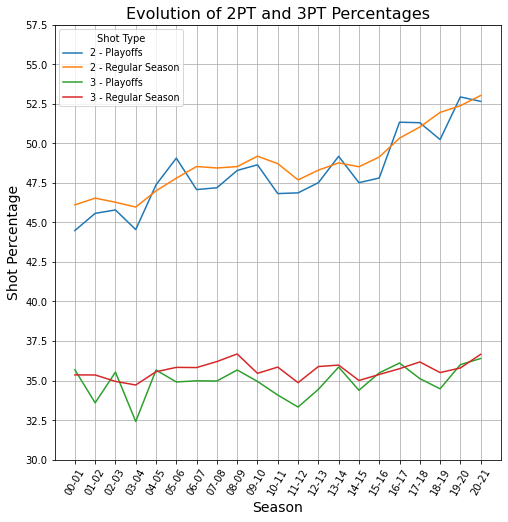

In [32]:
# GOAL: Plot 2PT and 3PT percentages together
plt.figure(figsize=(8,8))
plt.title('Evolution of 2PT and 3PT Percentages', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Shot Percentage', fontsize=14)

# Plot 2PT and 3PT separately
for shot_type, shot_data in enumerate([two_pointers_percentage, three_pointers_percentage]):
    for season_stage in shot_data['SEASON STAGE'].unique():
        plt.plot(
            'SEASON ID', 'SHOT PERCENTAGE',
            data=shot_data[shot_data['SEASON STAGE'] == season_stage], 
            label='{} - {}'.format(shot_type+2, season_stage)
        )

x_labels = [season[2:] for season in avg_2pt_per_48['SEASON ID'].unique()]

plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.xticks(np.arange(0,21), x_labels)
plt.yticks(np.arange(30, 60, step=2.5))
plt.grid(True)
plt.legend(title='Shot Type', fontsize=9.5)

plt.savefig('./Graphs/Shots/Evolution of 2PT and 3PT Percentages')

### Results
The 2PT percentage shows an improvement throughout the years, reaching the [widely pursued 50% mark](https://en.wikipedia.org/wiki/50%E2%80%9340%E2%80%9390_club) from 2016-17 up to present day. If we think about the amount of 2PT shots taken per game from section "AVG 2&3PT per Game", the decrease in the number of 2PT shots has had a positive effect on its percentage. Perhaps due to the fewer number of 2PT shots, the 2PT shot selection has improved significantly, leading to higher shot efficiency. Meanwhile the 3PT percentage has stayed more or less constant. This can be considered a good sign because the number of 3PT shots taken per 48 has increased a lot throughout the years without causing a decrease in the 3PT percentage. 

# Action Types
Analyse the usage of different kinds of shots throughout the years.
To understand what each action is (video), you can search a player's shooting stats and filter the action type (e.g. [Evan Mobley actions](https://www.nba.com/stats/player/1630596/shooting/?dir=1&sort=FGM))

In [110]:
action_types = all_shots.groupby(['SEASON ID', 'GAME ID', 'ACTION TYPE', 'SEASON STAGE']).size().reset_index(name='PER GAME')
action_types = action_types.groupby(['SEASON ID', 'ACTION TYPE', 'SEASON STAGE']).mean().reset_index().drop('GAME ID', axis=1)
action_types

,SEASON ID,ACTION TYPE,SEASON STAGE,PER GAME
0,2000-01,Alley Oop Dunk Shot,Playoffs,1.296296
1,2000-01,Alley Oop Dunk Shot,Regular Season,1.453744
2,2000-01,Alley Oop Layup shot,Playoffs,1.000000
3,2000-01,Alley Oop Layup shot,Regular Season,1.171429
4,2000-01,Driving Dunk Shot,Playoffs,2.035714
...,...,...,...,...
1723,2020-21,Turnaround Fadeaway shot,Regular Season,2.762752
1724,2020-21,Turnaround Hook Shot,Playoffs,2.275362
1725,2020-21,Turnaround Hook Shot,Regular Season,2.505402
1726,2020-21,Turnaround Jump Shot,Playoffs,3.375000


## Shot Categories

In [111]:
# Group types of shots by categories
def get_shot_category(shot_type):
    possible_categories = [
        'Dunk', 'Alley Oop', 'Jump Shot', 'Layup', 'Hook Shot', 
            'Fadeaway', 'Tip Shot', 'Bank Shot', 'Finger Roll'
    ]

    shot_categories = []
    for category in possible_categories:
        if category.lower() in shot_type.lower():
            shot_categories.append(category)

    if len(shot_categories) == 0:
        shot_categories.append('No Category')

    return ' & '.join(sorted(shot_categories))

action_types['SHOT CATEGORY'] = action_types['ACTION TYPE'].apply(get_shot_category)
action_types = action_types.sort_values(['SEASON ID', 'ACTION TYPE', 'SEASON STAGE'], ascending=(True, True, False)).reset_index(drop=True)

print('There are {} unique shot categories:'.format(len(action_types['SHOT CATEGORY'].unique())))
print(' / '.join(sorted(action_types['SHOT CATEGORY'].unique())), end='\n\n')

action_types

There are 14 unique shot categories:
Alley Oop & Dunk / Alley Oop & Layup / Bank Shot / Bank Shot & Fadeaway / Dunk / Fadeaway / Fadeaway & Jump Shot / Finger Roll / Finger Roll & Layup / Hook Shot / Jump Shot / Layup / No Category / Tip Shot



,SEASON ID,ACTION TYPE,SEASON STAGE,PER GAME,SHOT CATEGORY
0,2000-01,Alley Oop Dunk Shot,Regular Season,1.453744,Alley Oop & Dunk
1,2000-01,Alley Oop Dunk Shot,Playoffs,1.296296,Alley Oop & Dunk
2,2000-01,Alley Oop Layup shot,Regular Season,1.171429,Alley Oop & Layup
3,2000-01,Alley Oop Layup shot,Playoffs,1.000000,Alley Oop & Layup
4,2000-01,Driving Dunk Shot,Regular Season,1.734463,Dunk
...,...,...,...,...,...
1723,2020-21,Turnaround Fadeaway shot,Playoffs,3.355263,Fadeaway
1724,2020-21,Turnaround Hook Shot,Regular Season,2.505402,Hook Shot
1725,2020-21,Turnaround Hook Shot,Playoffs,2.275362,Hook Shot
1726,2020-21,Turnaround Jump Shot,Regular Season,2.859110,Jump Shot


In [113]:
# Shots can belong to multiple categories, so
# count separately for categories with &
for category in action_types['SHOT CATEGORY'].unique():
    if '&' in category:
        cat_1, cat_2 = category.split(' & ')
        rows_to_remove = action_types[action_types['SHOT CATEGORY'] == category].copy()

        for new_category in [cat_1, cat_2]:
            df_new_cat = rows_to_remove.copy()
            df_new_cat['SHOT CATEGORY'] = new_category
            action_types = pd.concat([action_types, df_new_cat], ignore_index=True)

# Remove records whose categories contain &
action_types = action_types[~action_types['SHOT CATEGORY'].str.contains('&')]
action_types.sort_values(
    by=['SEASON ID', 'SHOT CATEGORY', 'SEASON STAGE'],
    ascending=(True, True, False), 
    inplace=True
)

action_types.reset_index(drop=True, inplace=True)

action_types

,SEASON ID,ACTION TYPE,SEASON STAGE,PER GAME,SHOT CATEGORY
0,2000-01,Alley Oop Dunk Shot,Regular Season,1.453744,Alley Oop
1,2000-01,Alley Oop Layup shot,Regular Season,1.171429,Alley Oop
2,2000-01,Alley Oop Dunk Shot,Playoffs,1.296296,Alley Oop
3,2000-01,Alley Oop Layup shot,Playoffs,1.000000,Alley Oop
4,2000-01,Driving Dunk Shot,Regular Season,1.734463,Dunk
...,...,...,...,...,...
1998,2020-21,Running Alley Oop Layup Shot,Playoffs,1.000000,Layup
1999,2020-21,Cutting Finger Roll Layup Shot,Playoffs,1.346154,Layup
2000,2020-21,Driving Finger Roll Layup Shot,Playoffs,3.394737,Layup
2001,2020-21,Finger Roll Layup Shot,Playoffs,1.083333,Layup


In [114]:
# Sum across categories
shot_categories = action_types.groupby(['SEASON ID', 'SEASON STAGE', 'SHOT CATEGORY']).sum().reset_index()
shot_categories

,SEASON ID,SEASON STAGE,SHOT CATEGORY,PER GAME
0,2000-01,Playoffs,Alley Oop,2.296296
1,2000-01,Playoffs,Dunk,13.982135
2,2000-01,Playoffs,Finger Roll,5.062500
3,2000-01,Playoffs,Hook Shot,9.288216
4,2000-01,Playoffs,Jump Shot,114.906334
...,...,...,...,...
357,2020-21,Regular Season,Fadeaway,7.290527
358,2020-21,Regular Season,Finger Roll,9.292808
359,2020-21,Regular Season,Hook Shot,9.164477
360,2020-21,Regular Season,Jump Shot,117.540031


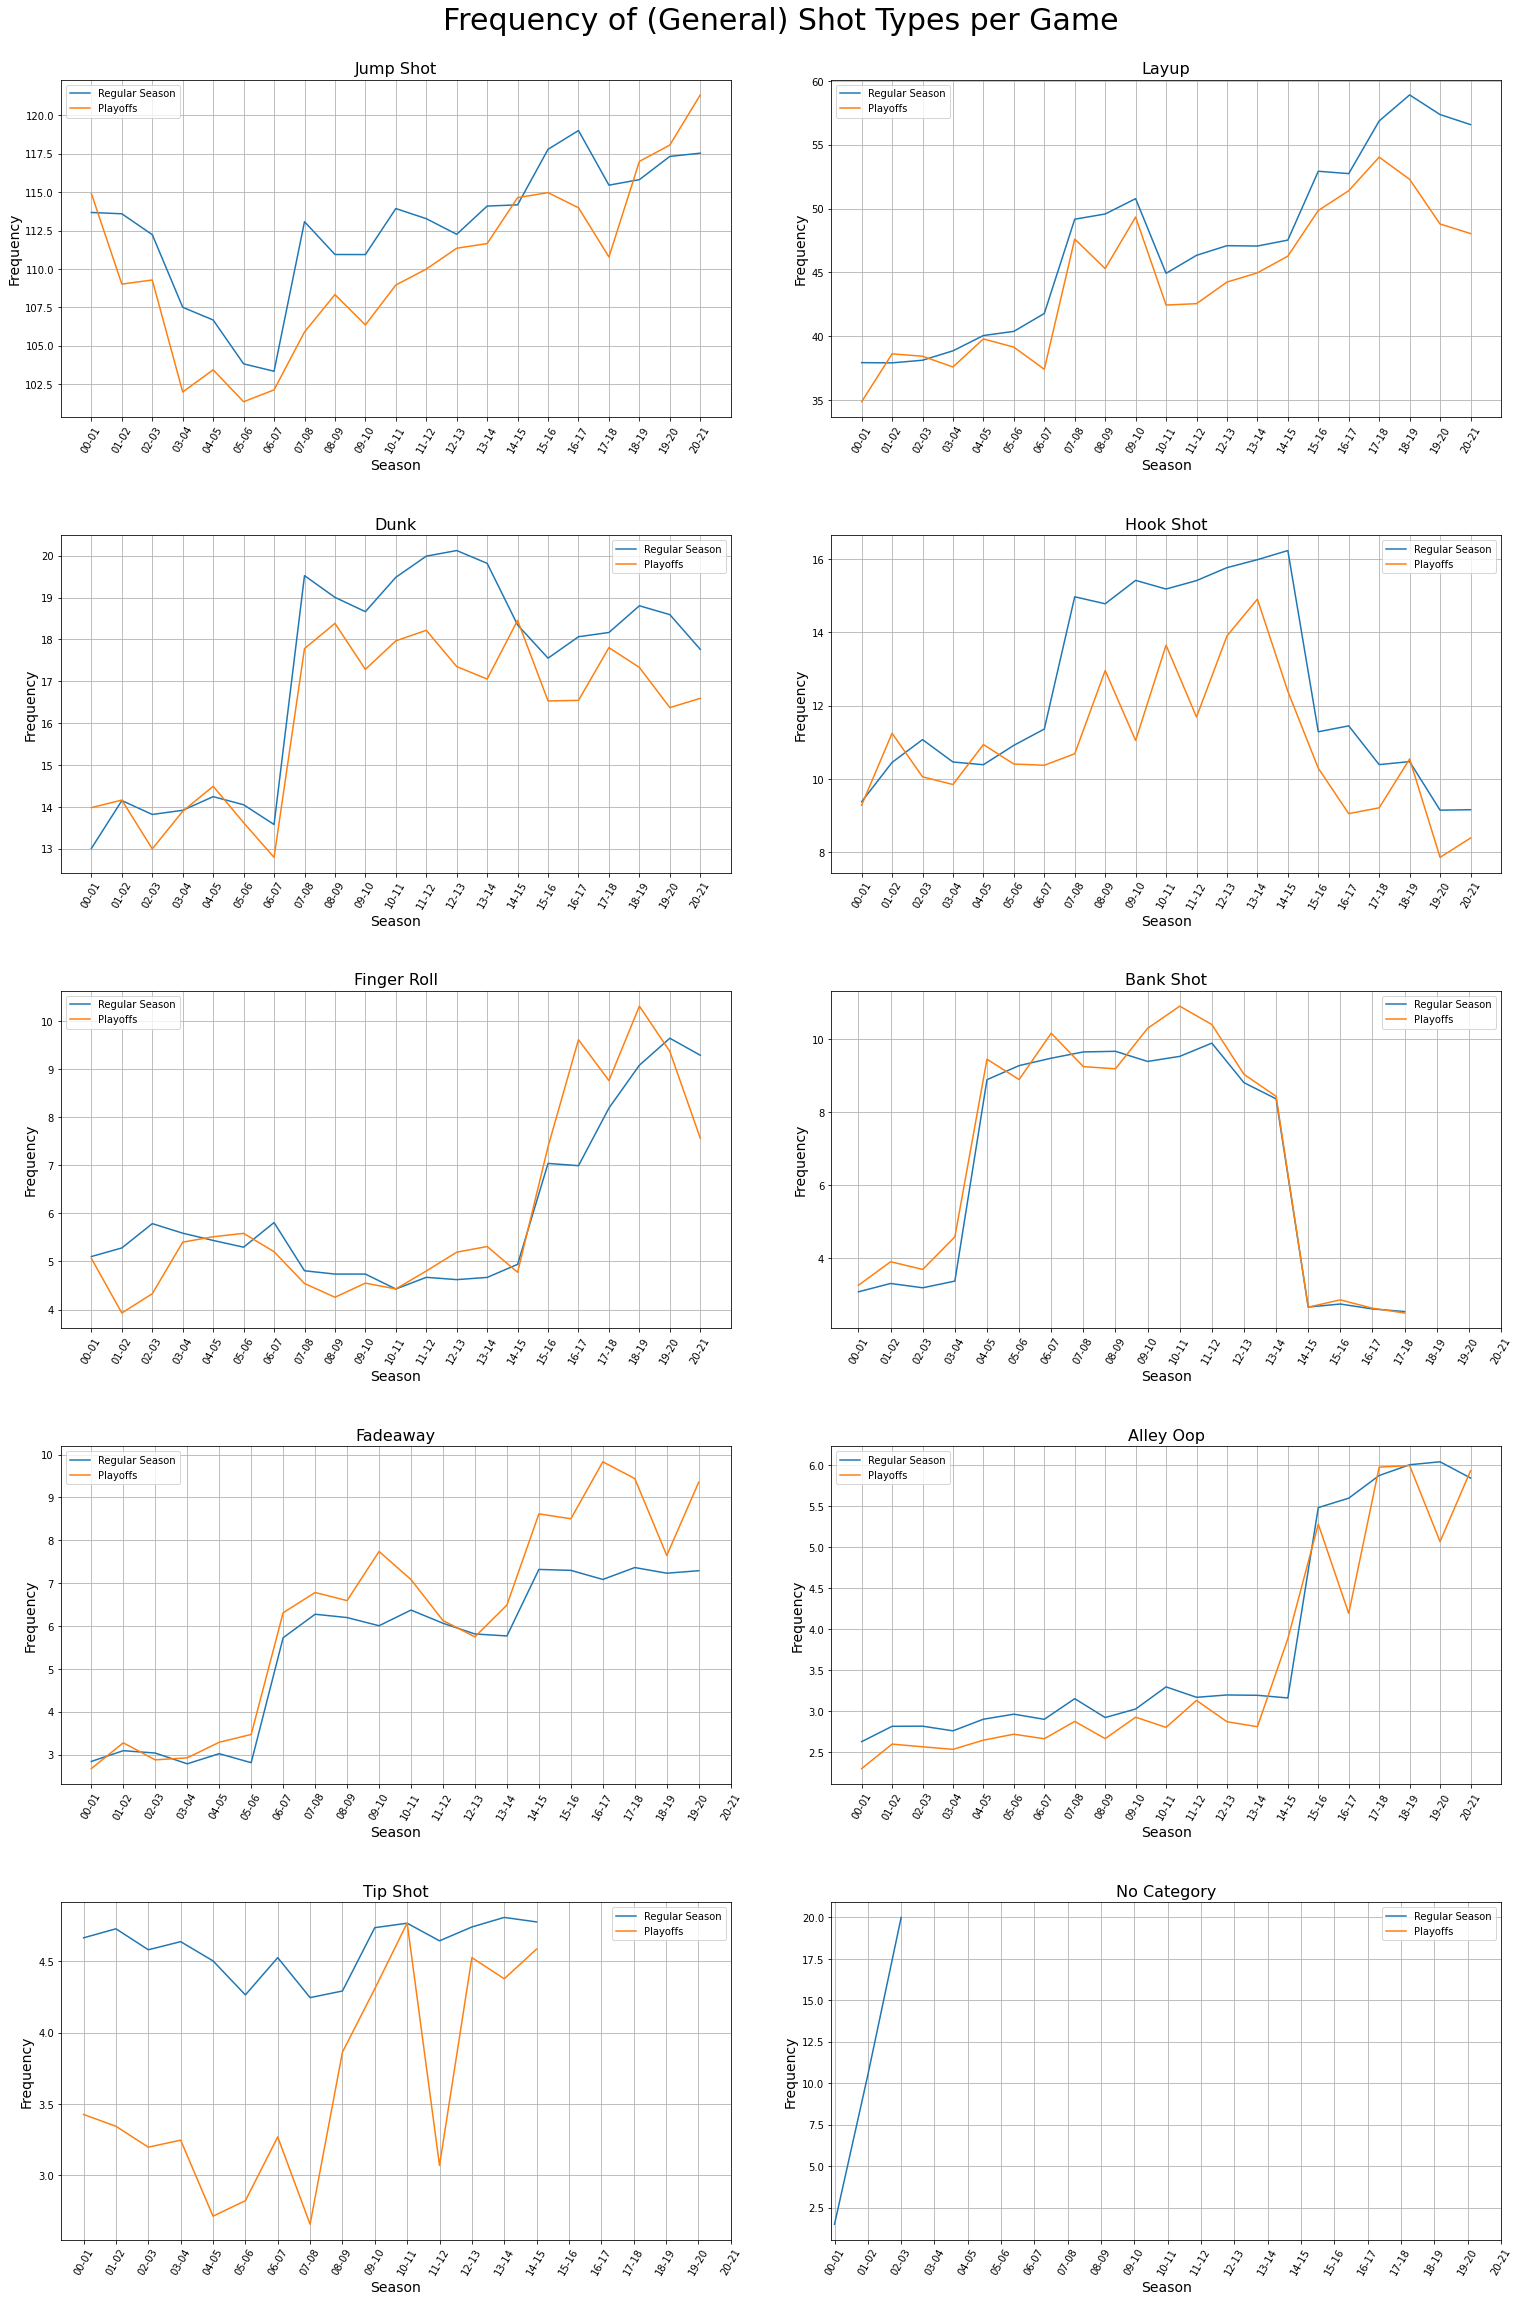

In [153]:
import warnings
warnings.filterwarnings('ignore')

# Dynamically draw subplots
# https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib 
num_subplots = len(action_types['SHOT CATEGORY'].unique())
num_cols = 2
num_rows = (num_subplots // num_cols) + (num_subplots % num_cols)
position = range(1, num_subplots+1) # Create position index


# Plot shot categories
fig = plt.figure(figsize=(25,50))
plt.axis('off')
plt.title('Frequency of (General) Shot Types per Game', fontsize=30, pad=50)

# Get most frequent categories
top_shot_categories = shot_categories.groupby('SHOT CATEGORY').sum().sort_values('PER GAME', ascending=False).reset_index()
# Plot from most to least frequent
k = 0
for category in top_shot_categories['SHOT CATEGORY'].unique():
    ax = fig.add_subplot(num_rows, num_cols, position[k])
    ax.set_title(category, fontsize=16)

    k += 1 # Update position index
    for season_stage in ['Regular Season', 'Playoffs']:
        ax.plot(
            'SEASON ID', 'PER GAME', 
            data=shot_categories[shot_categories['SHOT CATEGORY'] == category][shot_categories['SEASON STAGE'] == season_stage],
            label=season_stage
        )

        plt.xlabel('Season', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)

        x_labels = [season[2:] for season in shot_categories['SEASON ID'].unique()]
        plt.xticks(np.arange(0, 21), labels=x_labels)
        ax.tick_params(axis='x', which='major', labelsize=10, rotation=60)
        
        ax.legend()
        ax.grid(True)

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.35)

# plt.tight_layout()
plt.show()

## Jumpshots

In [159]:
jumpshots = action_types[action_types['ACTION TYPE'].str.lower().str.contains('jump shot')].reset_index(drop=True)
print('There are {} unique types of jump shots'.format(len(jumpshots['ACTION TYPE'].unique())))

jumpshots

There are 13 unique types of jump shots


,SEASON ID,ACTION TYPE,SEASON STAGE,PER GAME,SHOT CATEGORY
0,2000-01,Jump Shot,Regular Season,105.017662,Jump Shot
1,2000-01,Running Jump Shot,Regular Season,4.497104,Jump Shot
2,2000-01,Turnaround Jump Shot,Regular Season,4.161527,Jump Shot
3,2000-01,Jump Shot,Playoffs,104.338028,Jump Shot
4,2000-01,Running Jump Shot,Playoffs,5.901639,Jump Shot
...,...,...,...,...,...
376,2020-21,Step Back Bank Jump Shot,Playoffs,1.000000,Jump Shot
377,2020-21,Step Back Jump shot,Playoffs,11.047059,Jump Shot
378,2020-21,Turnaround Jump Shot,Playoffs,3.375000,Jump Shot
379,2020-21,Fadeaway Jump Shot,Playoffs,4.687500,Jump Shot


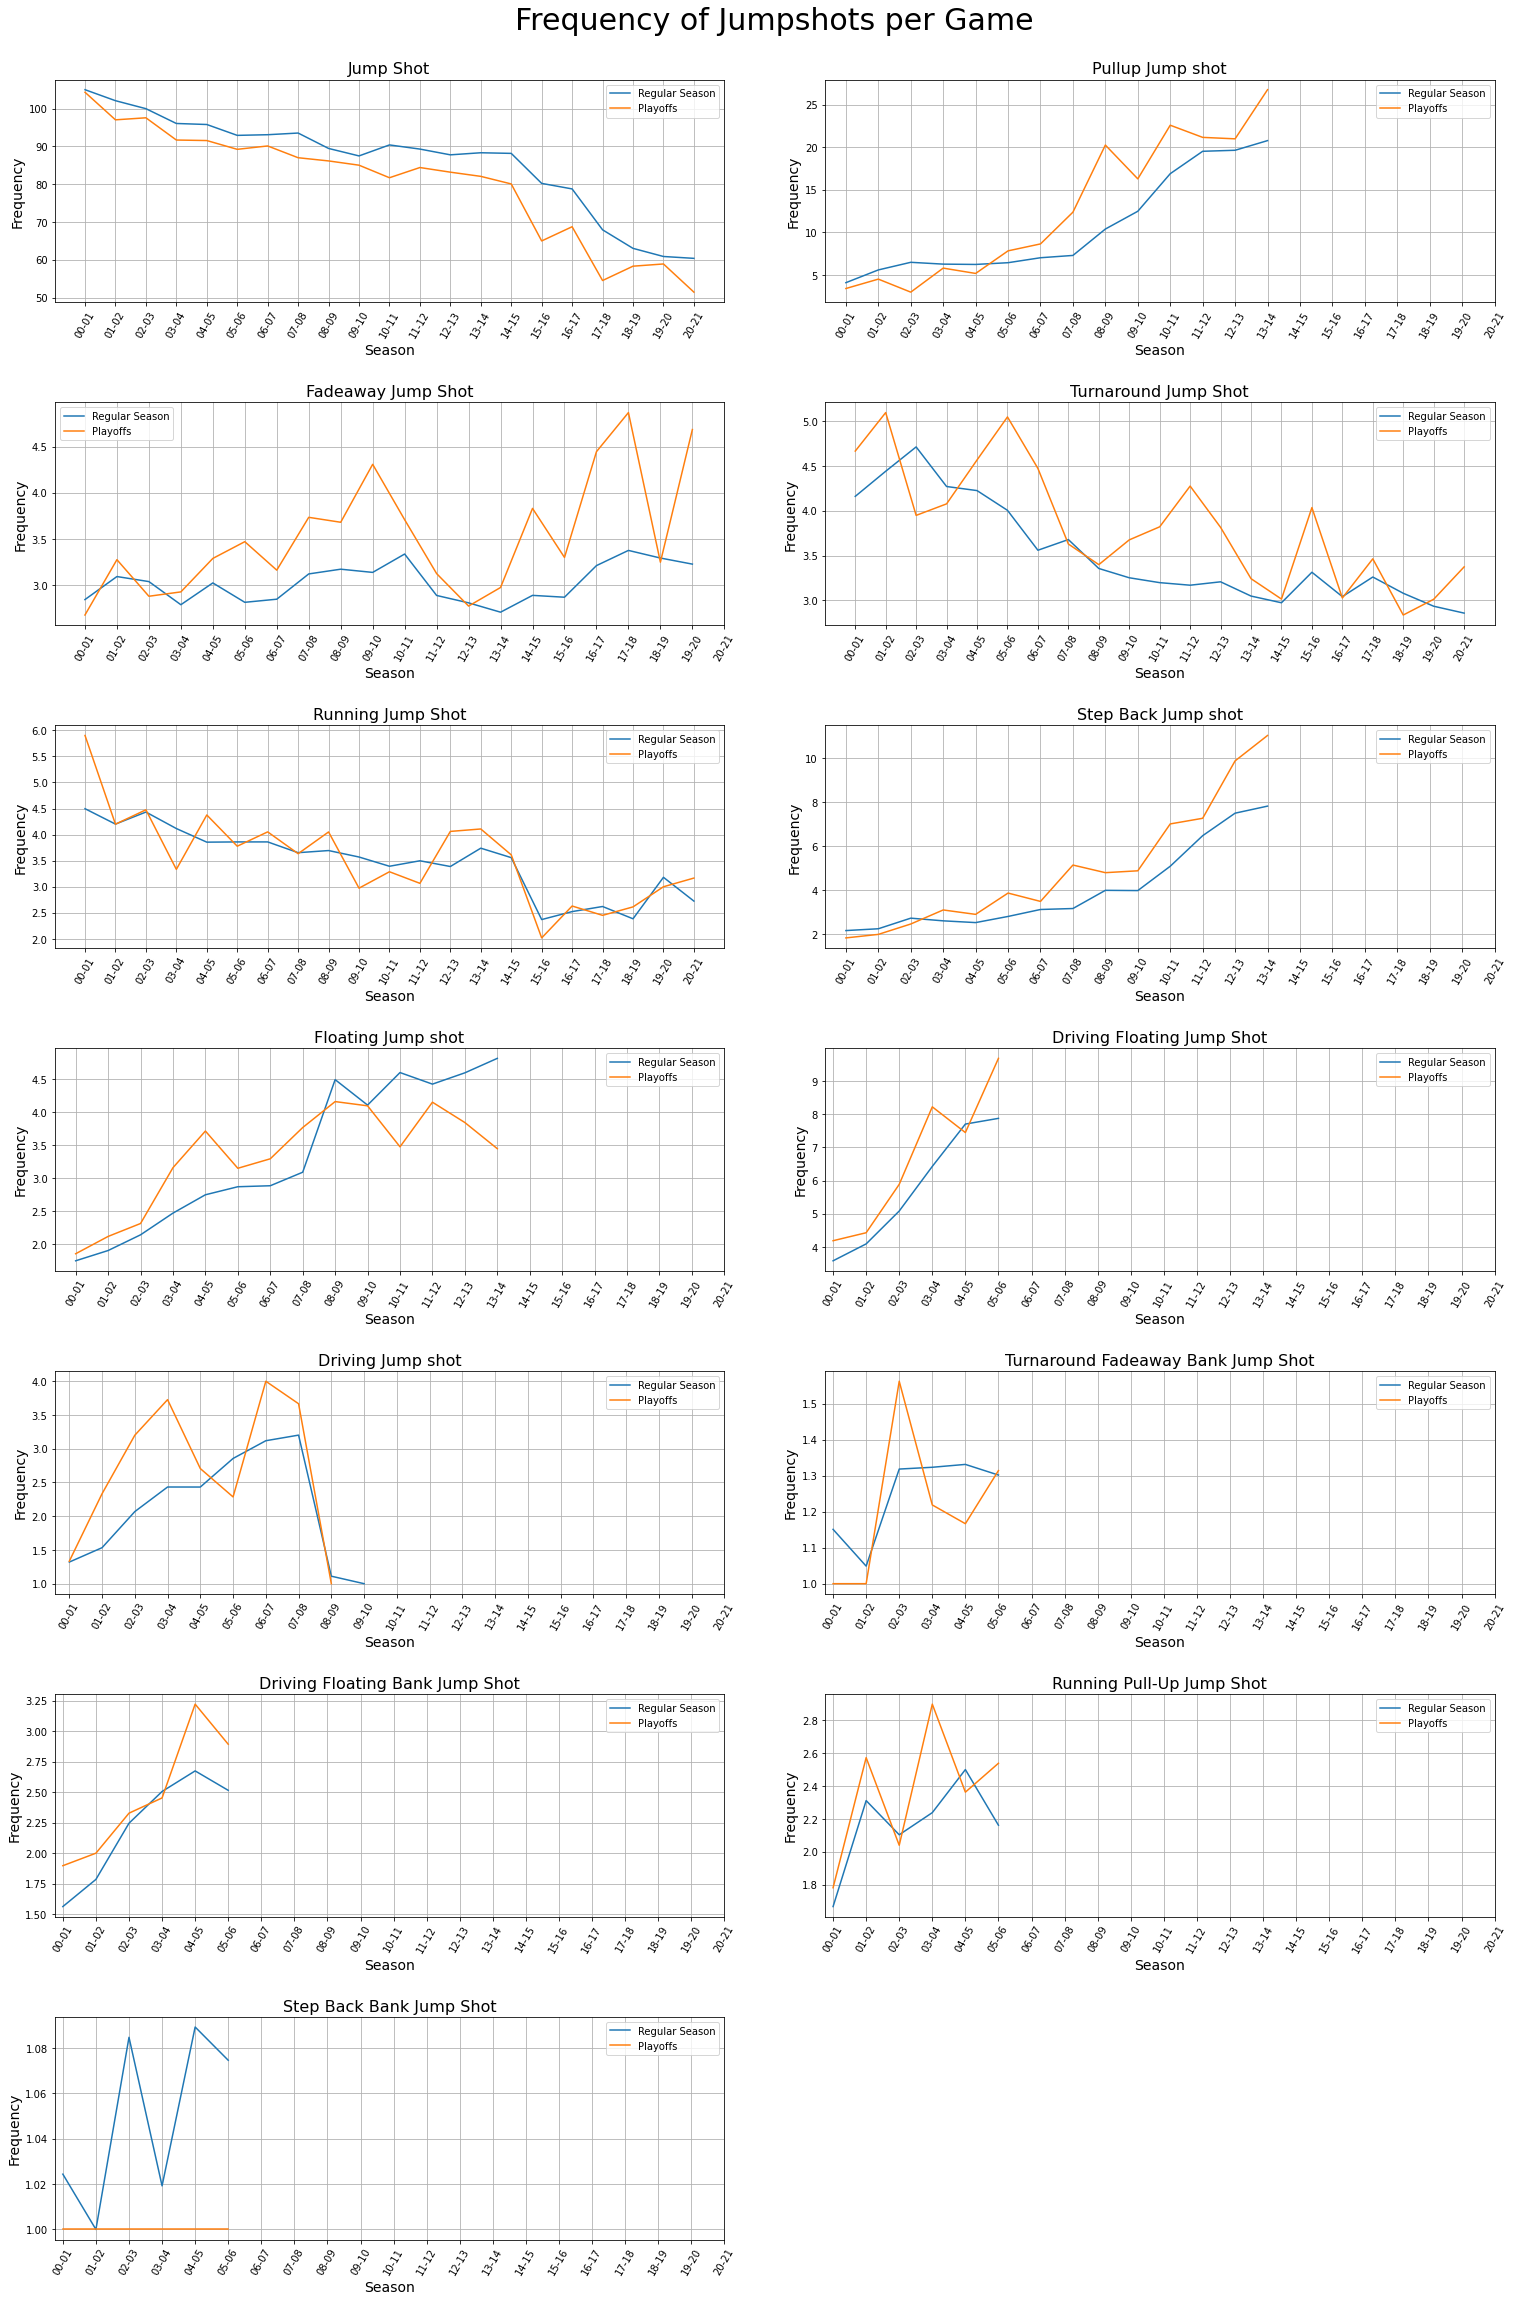

In [155]:
# Plot all kinds of jumpshots

# Dynamically draw subplots
# https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib 
num_subplots = len(jumpshots['ACTION TYPE'].unique())
num_cols = 2
num_rows = (num_subplots // num_cols) + (num_subplots % num_cols)
position = range(1, num_subplots+1) # Create position index

# Plot shot categories
fig = plt.figure(figsize=(25,50))
plt.axis('off')
plt.title('Frequency of Jumpshots per Game', fontsize=30, pad=50)

# Get most frequent jumpshots
top_jumpshots = jumpshots.groupby('ACTION TYPE').sum().sort_values('PER GAME', ascending=False).reset_index()
# Plot from most to least frequent
k = 0
for jumpshot_style in top_jumpshots['ACTION TYPE'].unique():
    ax = fig.add_subplot(num_rows, num_cols, position[k])
    ax.set_title(jumpshot_style, fontsize=16)

    k += 1 # Update position index
    for season_stage in ['Regular Season', 'Playoffs']:
        ax.plot(
            'SEASON ID', 'PER GAME', 
            data=jumpshots[jumpshots['ACTION TYPE'] == jumpshot_style][jumpshots['SEASON STAGE'] == season_stage],
            label=season_stage
        )

        plt.xlabel('Season', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)

        x_labels = [season[2:] for season in shot_categories['SEASON ID'].unique()]
        plt.xticks(np.arange(0, 21), labels=x_labels)
        ax.tick_params(axis='x', which='major', labelsize=10, rotation=60)
        ax.legend()
        ax.grid(True)

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.45)

# plt.tight_layout()
plt.show()

## Other

In [162]:
non_jumpshots = action_types[~action_types['ACTION TYPE'].str.lower().str.contains('jump shot')].reset_index(drop=True)
print('There are {} unique types of shots that are not jumpshots'.format(len(non_jumpshots['ACTION TYPE'].unique())))

non_jumpshots

There are 57 unique types of shots that are not jumpshots


,SEASON ID,ACTION TYPE,SEASON STAGE,PER GAME,SHOT CATEGORY
0,2000-01,Alley Oop Dunk Shot,Regular Season,1.453744,Alley Oop
1,2000-01,Alley Oop Layup shot,Regular Season,1.171429,Alley Oop
2,2000-01,Alley Oop Dunk Shot,Playoffs,1.296296,Alley Oop
3,2000-01,Alley Oop Layup shot,Playoffs,1.000000,Alley Oop
4,2000-01,Driving Dunk Shot,Regular Season,1.734463,Dunk
...,...,...,...,...,...
1617,2020-21,Running Alley Oop Layup Shot,Playoffs,1.000000,Layup
1618,2020-21,Cutting Finger Roll Layup Shot,Playoffs,1.346154,Layup
1619,2020-21,Driving Finger Roll Layup Shot,Playoffs,3.394737,Layup
1620,2020-21,Finger Roll Layup Shot,Playoffs,1.083333,Layup


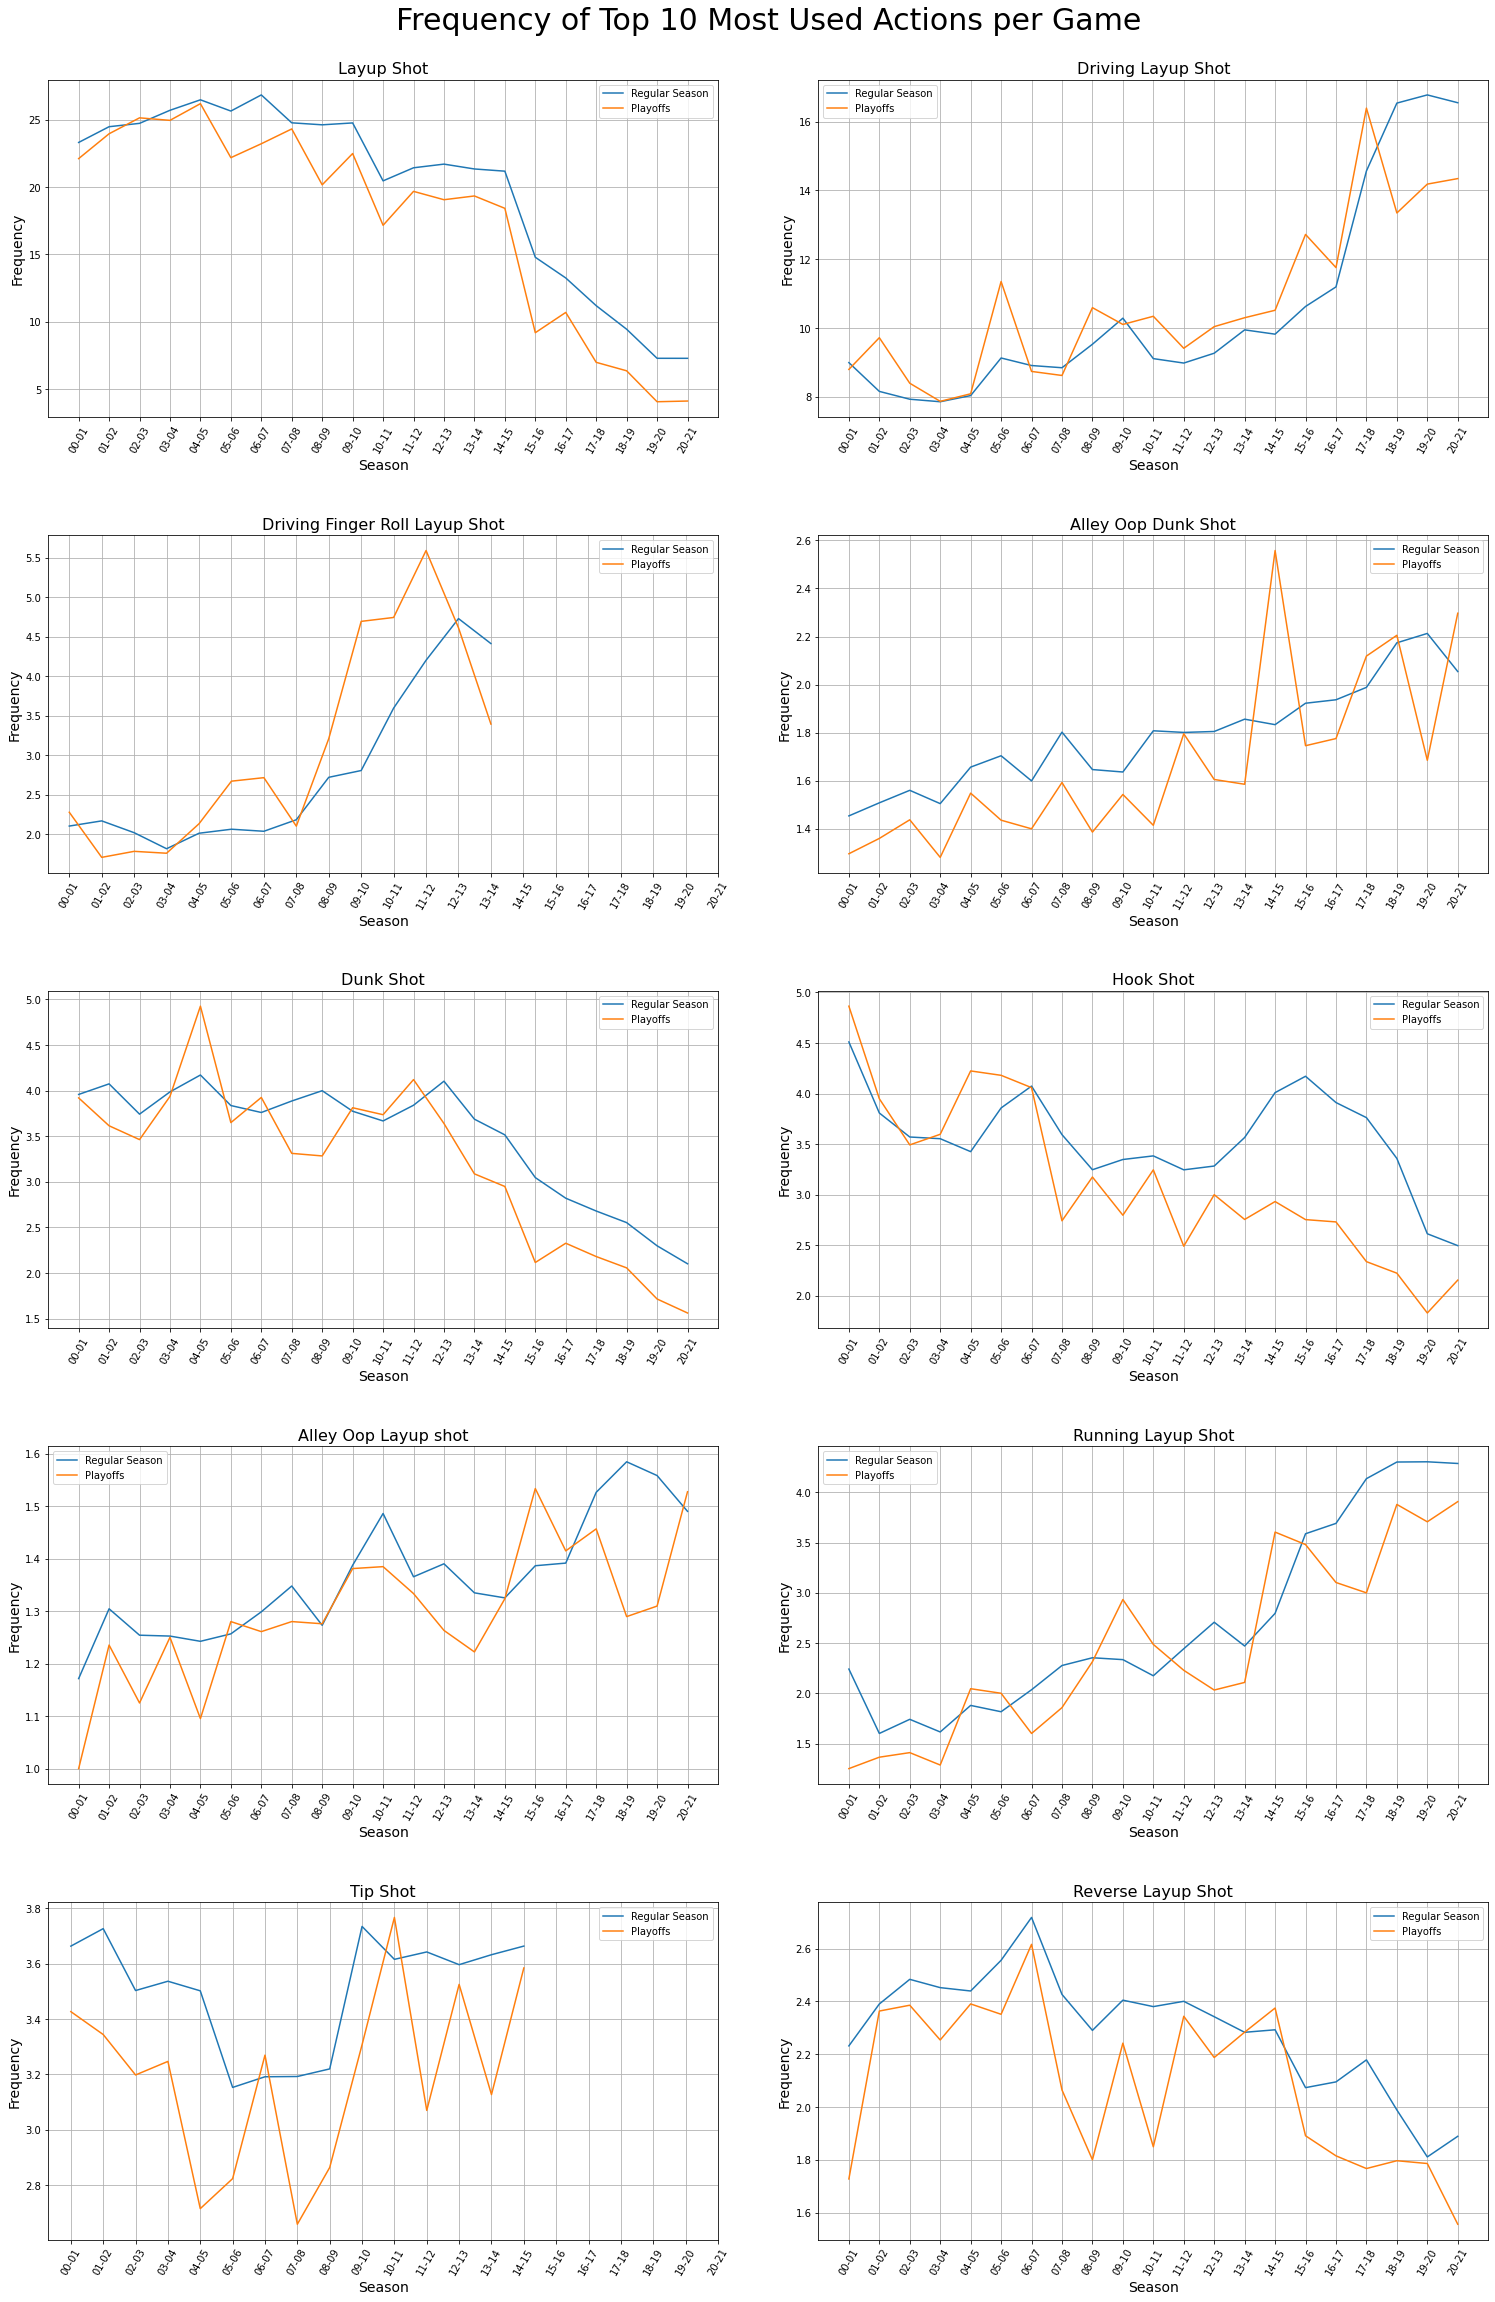

In [174]:
# Plot top 10 kinds of shots that are not jumpshots

# Dynamically draw subplots
# https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib 
num_subplots = 10
num_cols = 2
num_rows = (num_subplots // num_cols) + (num_subplots % num_cols)
position = range(1, num_subplots+1) # Create position index

# Plot shot categories
fig = plt.figure(figsize=(25,50))
plt.axis('off')
plt.title('Frequency of Top 10 Most Used Actions per Game', fontsize=30, pad=50)

# Get most frequent jumpshots
top_non_jumpshots = non_jumpshots.groupby('ACTION TYPE').sum().sort_values('PER GAME', ascending=False).reset_index()
# Plot from most to least frequent
k = 0
for shot_style in top_non_jumpshots['ACTION TYPE'].unique()[:10]:
    ax = fig.add_subplot(num_rows, num_cols, position[k])
    ax.set_title(shot_style, fontsize=16)

    k += 1 # Update position index
    for season_stage in ['Regular Season', 'Playoffs']:
        ax.plot(
            'SEASON ID', 'PER GAME', 
            data=non_jumpshots[non_jumpshots['ACTION TYPE'] == shot_style][non_jumpshots['SEASON STAGE'] == season_stage],
            label=season_stage
        )

        plt.xlabel('Season', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)

        x_labels = [season[2:] for season in shot_categories['SEASON ID'].unique()]
        plt.xticks(np.arange(0, 21), labels=x_labels)
        ax.tick_params(axis='x', which='major', labelsize=10, rotation=60)
        ax.legend()
        ax.grid(True)

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.35)

# plt.tight_layout()
plt.show()

# Shot Locations